In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import awkward as ak
from joblib import Parallel, delayed

In [17]:
def get_counts_w_dt(n, N, dt):
    ion_counts = ss.poisson.rvs(n, size=N)
    
    ion_t_dist_flat = np.random.uniform(size=np.sum(ion_counts))
    ion_t_dist = ak.unflatten(ion_t_dist_flat,ion_counts)
    ion_t_dist = ak.sort(ion_t_dist, axis=1)
    
    ion_counts_dt = np.sum((ion_t_dist[:,1:] - ion_t_dist[:,:-1]) > dt, axis=1) + np.array(ion_counts > 0, dtype=int)

    return np.mean(ion_counts), np.std(ion_counts)**2, np.mean(ion_counts_dt), np.std(ion_counts_dt)**2, \
        np.histogram(ion_counts, bins=np.arange(0, np.max(ion_counts)+1)), np.histogram(ion_counts_dt, bins=np.arange(0, np.max(ion_counts)+1)),\
        np.sum((ion_counts - np.mean(ion_counts))**2)/np.mean(ion_counts),\
        np.sum((ion_counts_dt - np.mean(ion_counts_dt))**2)/np.mean(ion_counts_dt),
    # Dispersion test https://web.archive.org/web/20131125225020/http://www.stats.uwo.ca/faculty/aim/2004/04-259/notes/DispersionTests.pdf \    

In [18]:
dt = 5*1e-3
N = 10000
ns = np.arange(1, 100, 1)
results = Parallel(n_jobs=8, verbose=10)(delayed(get_counts_w_dt)(n, N, dt) for n in ns)
mean,variance,mean_dt,variance_dt,hist,hist_dt,D,D_dt = zip(*results)

variance = np.array(variance)
mean = np.array(mean)
variance_dt = np.array(variance_dt)
mean_dt = np.array(mean_dt)
D = np.array(D)
D_dt = np.array(D_dt)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Batch computation too fast (0.043309926986694336s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Batch computation too fast (0.17800498008728027s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  94 out of  99 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  99 out of  99 | elapsed:    1.8s finished


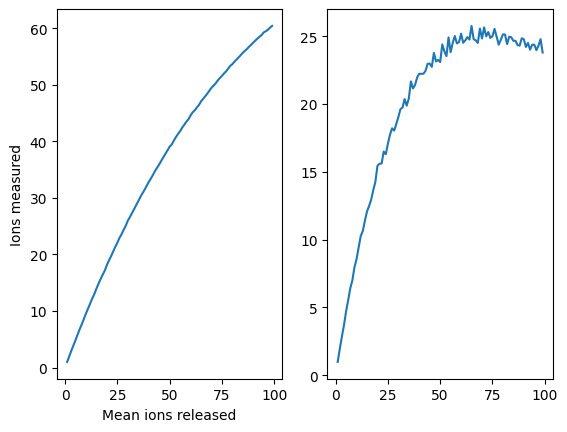

In [19]:
fig,ax = plt.subplots(1,2)

ax[0].plot(ns, mean_dt)
ax[0].set_xlabel('Mean ions released')
ax[0].set_ylabel('Ions measured')

ax[1].plot(ns,variance_dt)

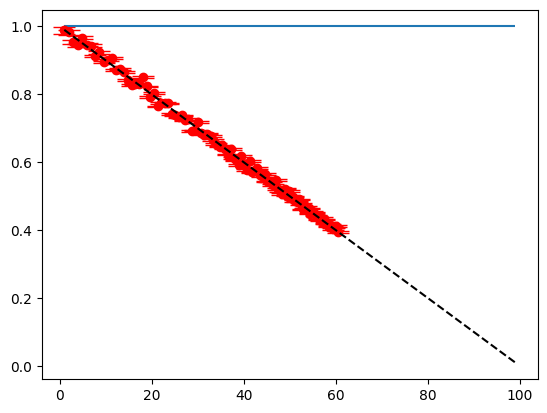

In [20]:
# plt.errorbar(ns, mean/variance, np.sqrt(variance/N)/variance, capsize=8, fmt='ko')
plt.errorbar(mean_dt, variance_dt/mean_dt, np.sqrt(variance_dt/N)/variance_dt, capsize=8, fmt='ro')
plt.plot(ns, 1-ns*dt*2, 'k--', zorder=10)
plt.hlines(1, np.min(ns), np.max(ns))

<BarContainer object of 41 artists>

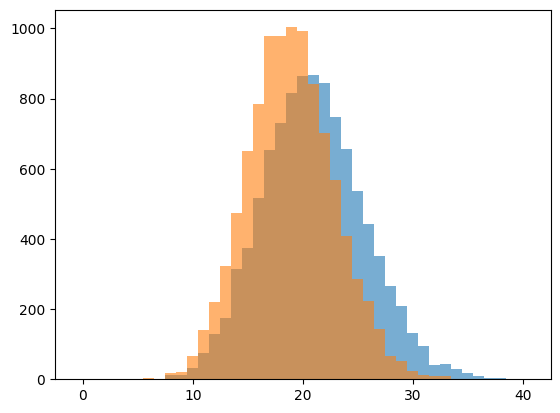

In [21]:
i = 20
plt.bar(hist[i][1][:-1],   hist[i][0],     width=1, alpha=0.6)
plt.bar(hist_dt[i][1][:-1],hist_dt[i][0],  width=1, alpha=0.6)